<a href="https://colab.research.google.com/github/Prshant45/NSE-Indicators/blob/master/rsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ploting different new features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
!pip install ta
!pip install fyers-apiv2
from fyers_api import fyersModel
from fyers_api import accessToken
import ta

In [ ]:
session=accessToken.SessionModel(client_id='',
secret_key='',redirect_uri='https://colab.research.google.com/drive/1WSzYDjHbWjM_nlA1kzTvQQ9S7vj2XLwp#scrollTo=-PmEGxMdMygq', 
response_type='code')

response = session.generate_authcode() 
print(response) 

https://api.fyers.in/api/v2/generate-authcode?client_id=UCKG1H22YV-100&redirect_uri=https%3A%2F%2Fcolab.research.google.com%2Fdrive%2F1WSzYDjHbWjM_nlA1kzTvQQ9S7vj2XLwp%23scrollTo%3D-PmEGxMdMygq&response_type=code&state=None


In [ ]:
appSession = accessToken.SessionModel(client_id='', secret_key='',grant_type="authorization_code")

# we need to pass the auth code in set_token method
appSession.set_token('')
# generate_token function will return us the access token and we store in variable "access_token"
access_token = appSession.generate_token()
print(access_token)

{'s': 'error', 'code': -413, 'message': 'Your auth code has expired. Please generate a new auth code'}


In [ ]:
access_token = ''
fyers = fyersModel.FyersModel(token=access_token, is_async=False, client_id='')

In [ ]:
data = {"symbol":"NSE:SBIN-EQ","resolution":"D","date_format":"0","range_from":"1622097600","range_to":"1622097685","cont_flag":"1"}
fyers.history(data)

{'candles': [[1622073600, 413.7, 429.1, 412.0, 425.2, 73392997]], 's': 'ok'}

In [ ]:
# Load data
df = pd.read_csv('data.csv', sep=',')
#df = ta.utils.dropna(df)

In [ ]:
df.shape

(5, 8)

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1315918800,5.80,6.00,5.80,6.00,25.000000,149.190000,5.967600
1,1315922400,5.95,5.95,5.76,5.76,22.353982,132.041023,5.906823
2,1315926000,5.65,5.65,5.65,5.65,2.542000,14.362300,5.650000
3,1315940400,5.92,5.97,5.92,5.97,8.475400,50.504066,5.958901
4,1315983600,5.58,5.62,5.54,5.62,16.425700,91.537032,5.572793


In [ ]:
# Add all ta features filling nans values
#df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume_BTC", fillna=True)
rsi = ta.momentum.RSIIndicator(df.Close, window=2, fillna=False)

In [ ]:
rsi_df = rsi.rsi()
rsi_df.head()

0          NaN
1     0.000000
2     0.000000
3    73.563218
4    28.193833
Name: rsi, dtype: float64

# Ploting some volatility features

### RSI

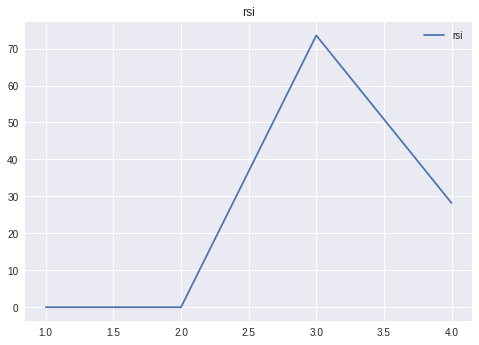

In [ ]:

plt.plot(rsi_df, label='rsi')
plt.title('rsi')
plt.legend()
plt.show()

### Keltner Channel

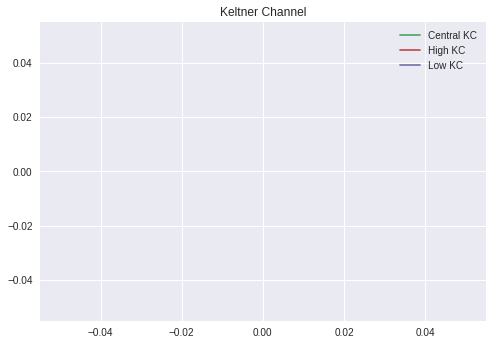

In [ ]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_kcc, label='Central KC')
plt.plot(df[40500: 41000].volatility_kch, label='High KC')
plt.plot(df[40500: 41000].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

### Donchian Channel

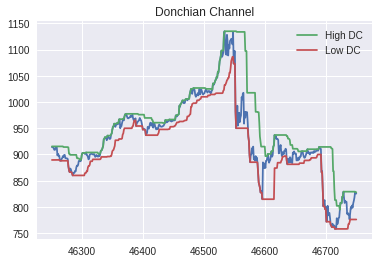

In [ ]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_dch, label='High DC')
plt.plot(df[40500: 41000].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

# Ploting trend features

### MACD

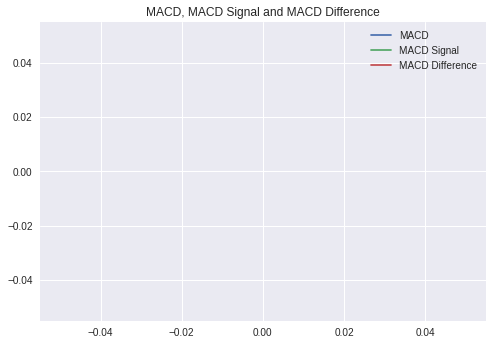

In [ ]:
plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

### KST

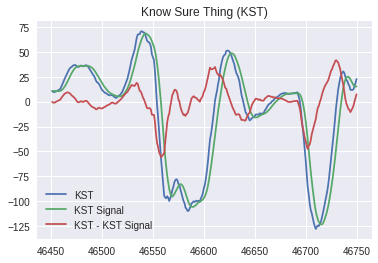

In [ ]:
plt.plot(df[40700:41000].trend_kst, label='KST')
plt.plot(df[40700:41000].trend_kst_sig, label='KST Signal')
plt.plot(df[40700:41000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()

### Ichimoku Kinkō Hyō

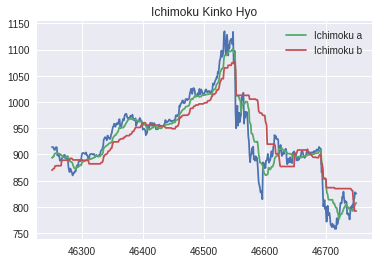

In [ ]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40500:41000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[40500:41000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

# Ploting all features

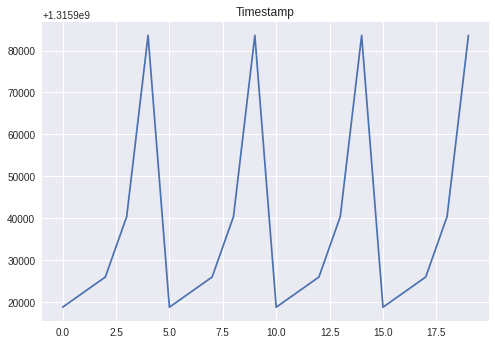

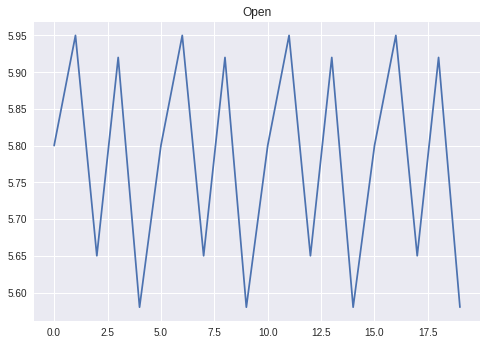

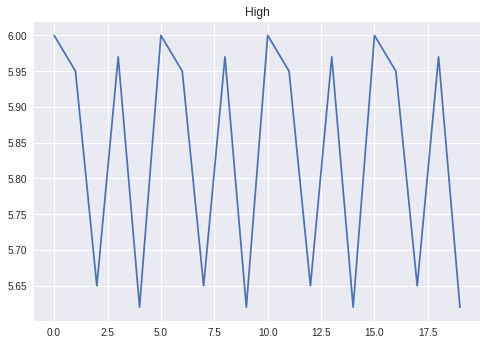

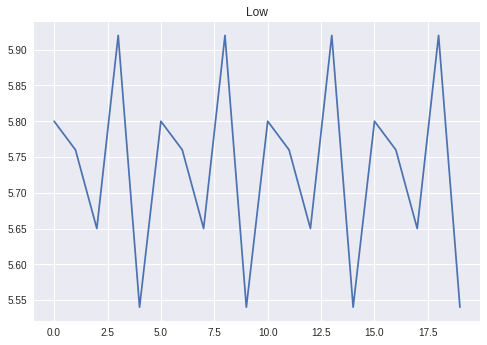

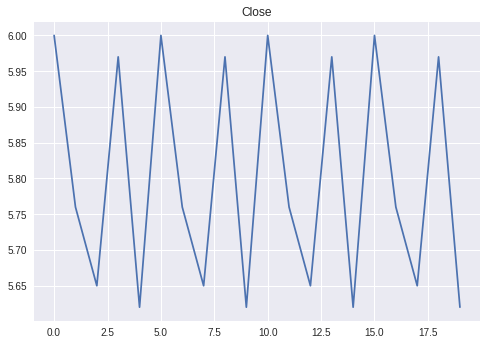

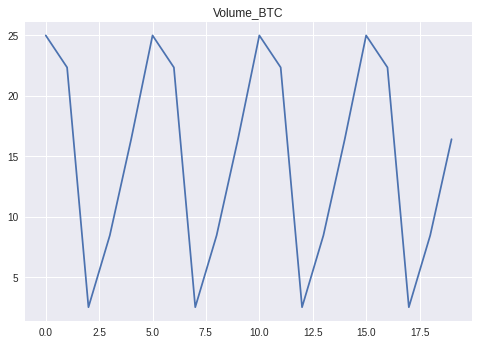

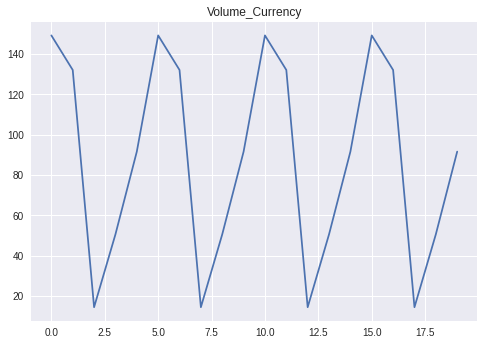

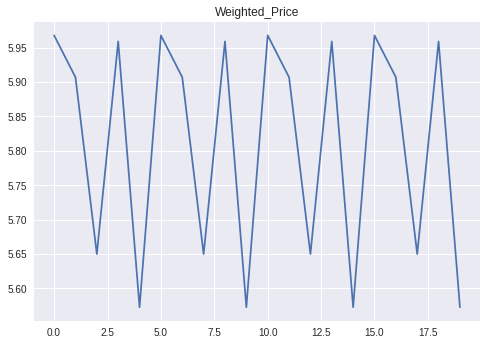

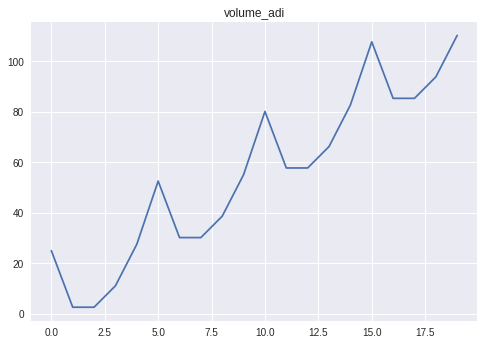

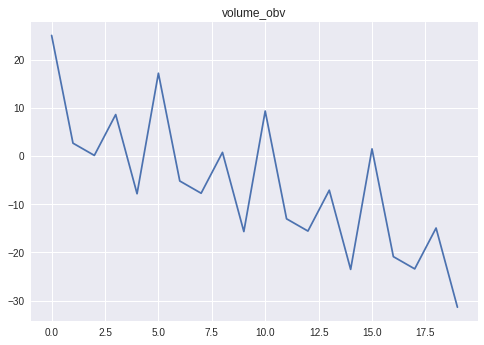

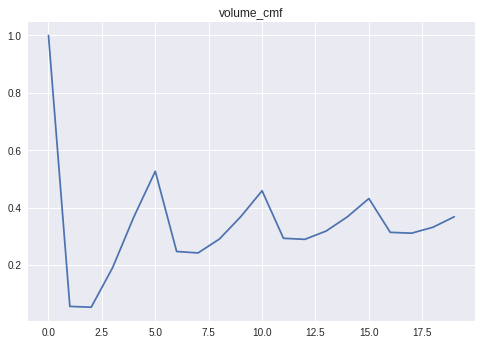

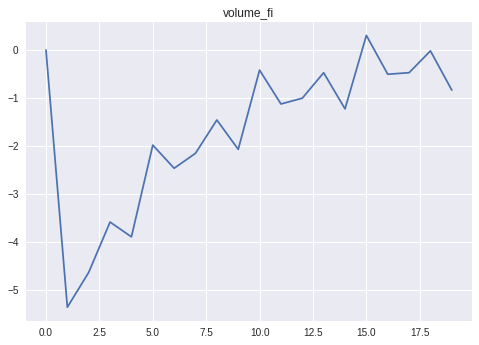

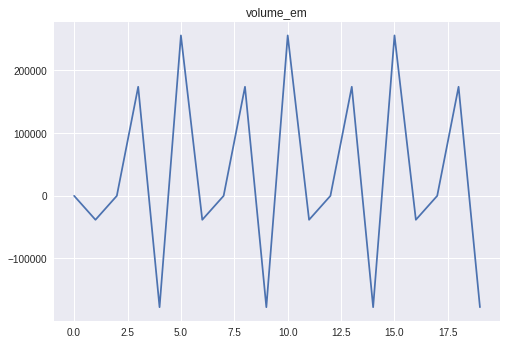

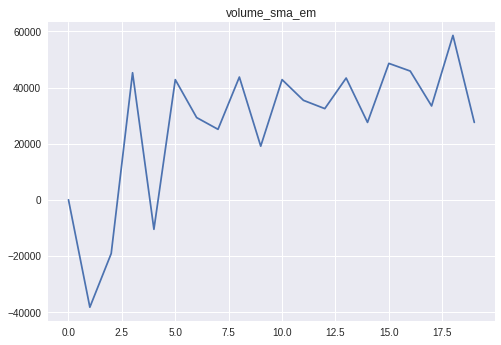

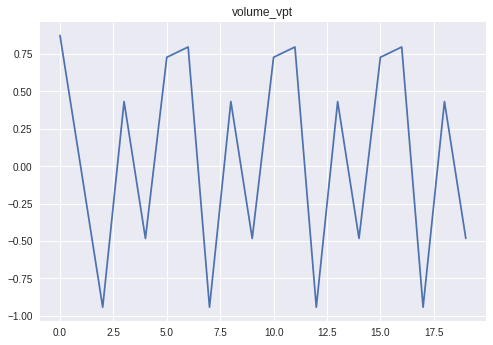

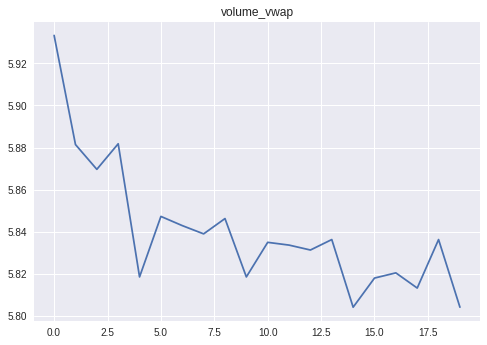

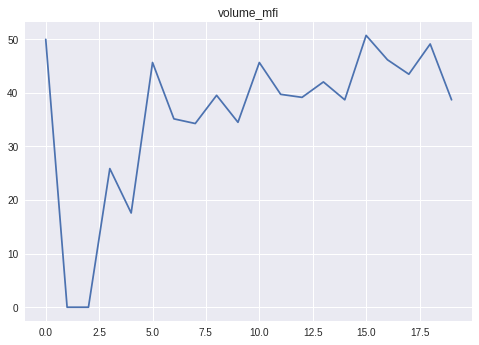

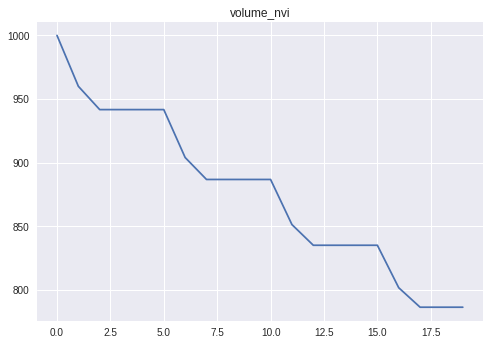

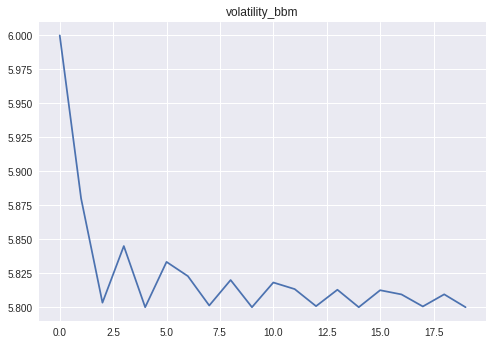

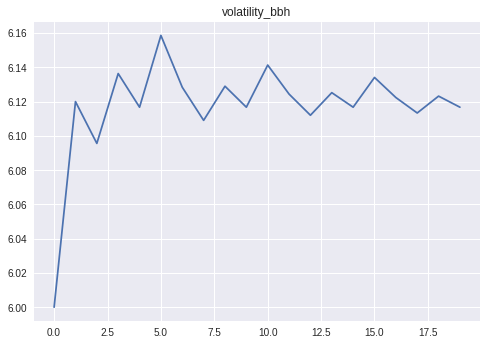

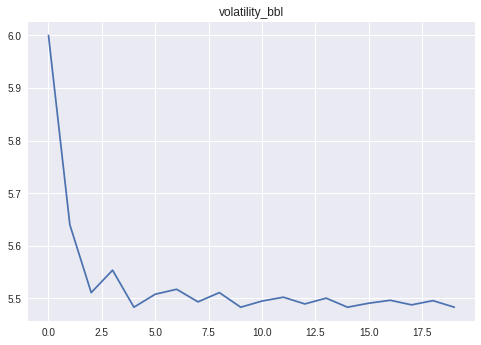

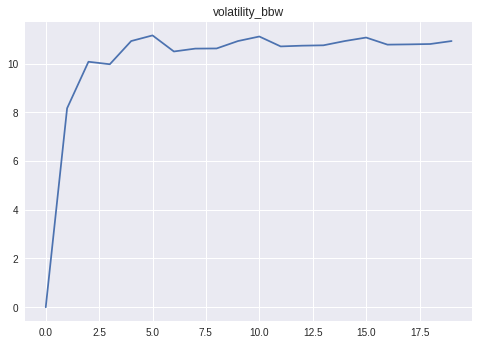

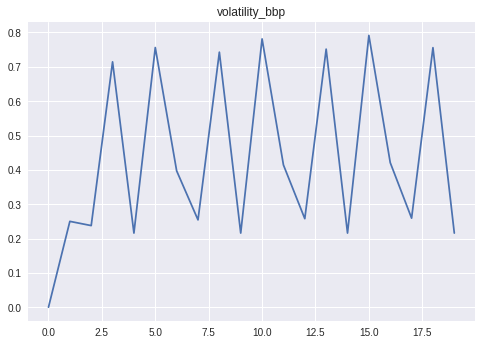

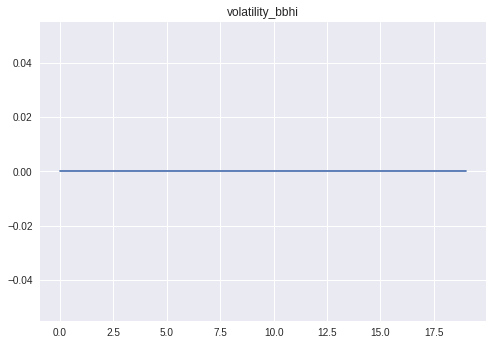

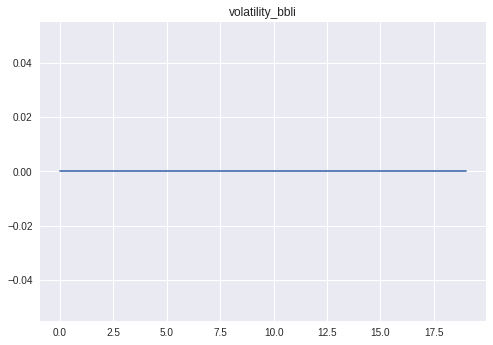

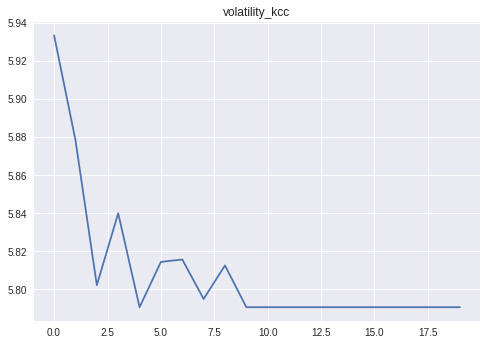

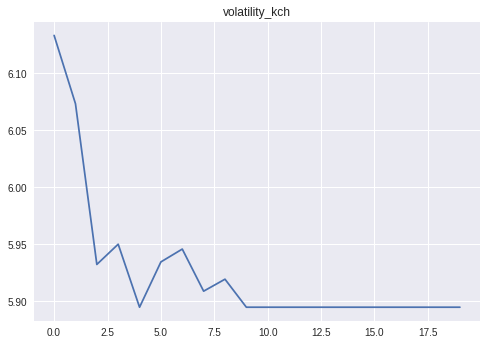

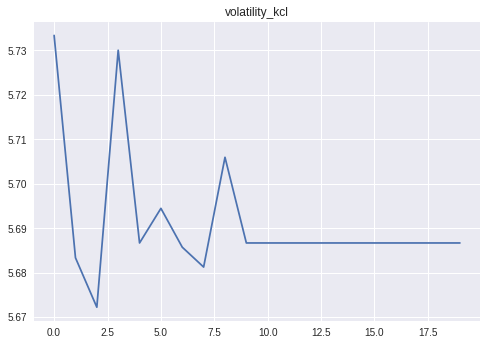

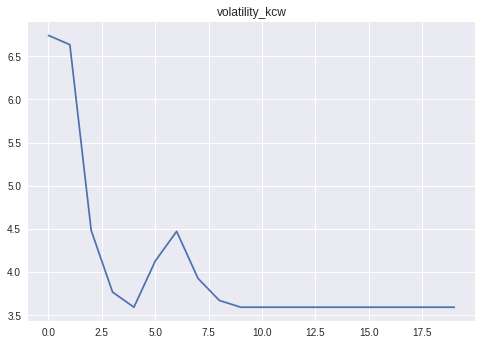

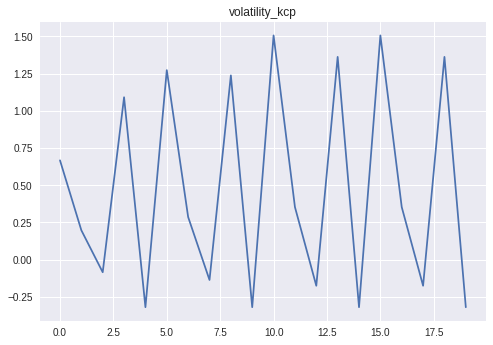

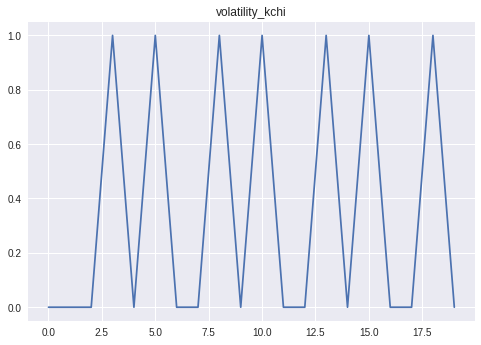

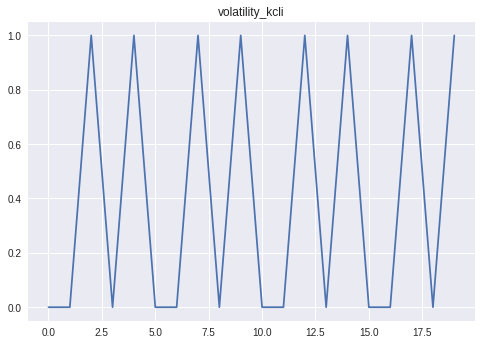

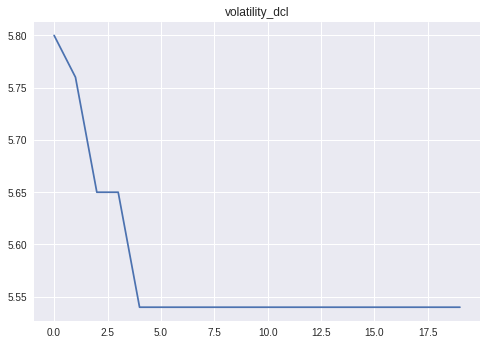

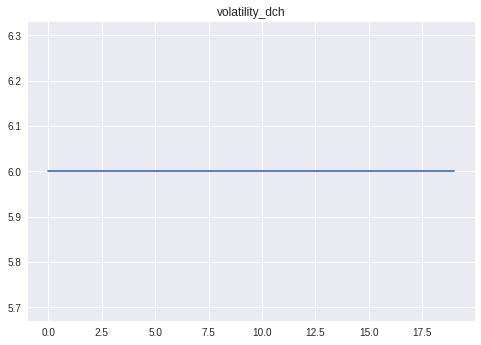

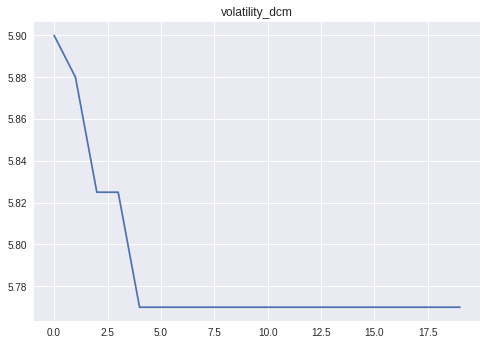

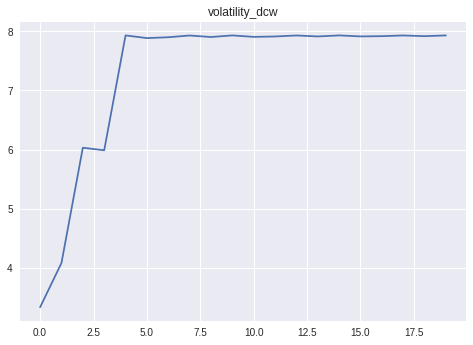

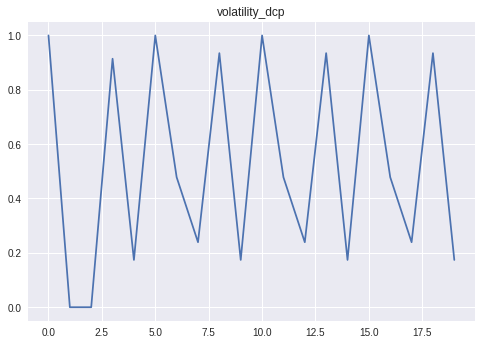

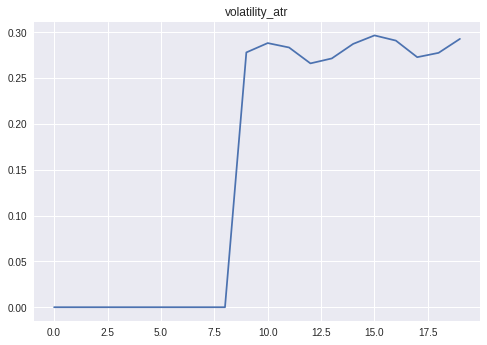

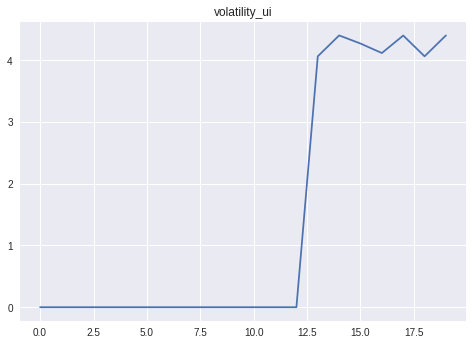

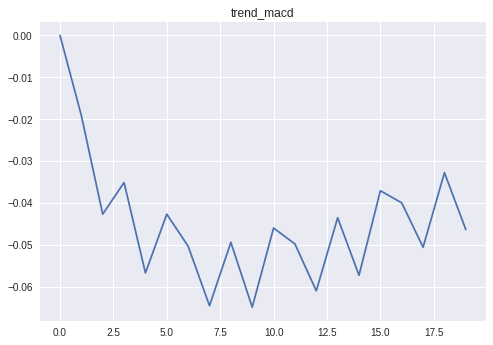

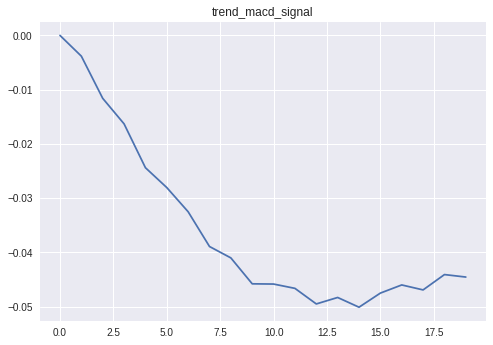

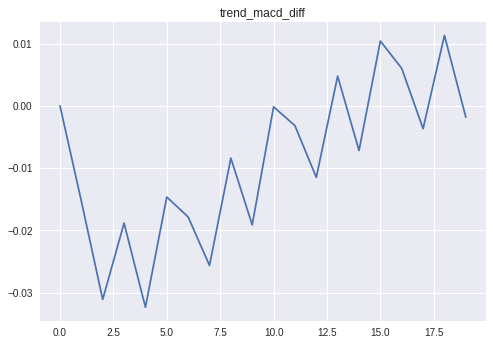

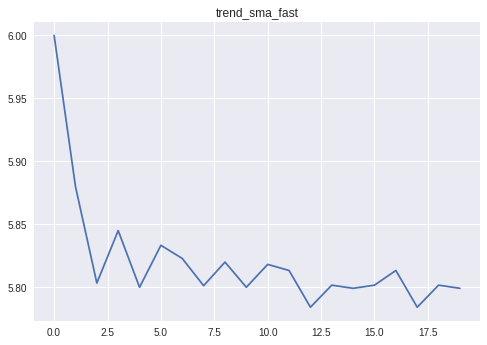

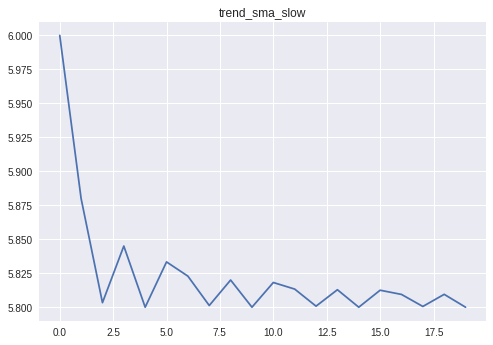

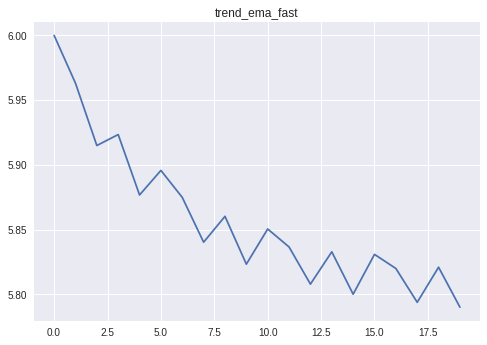

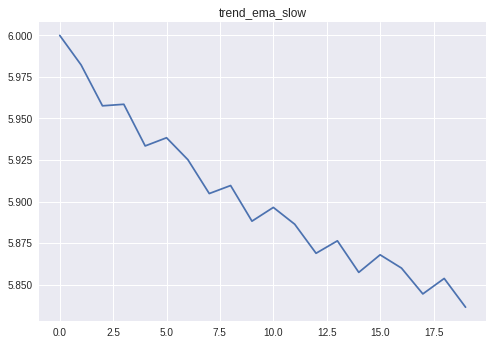

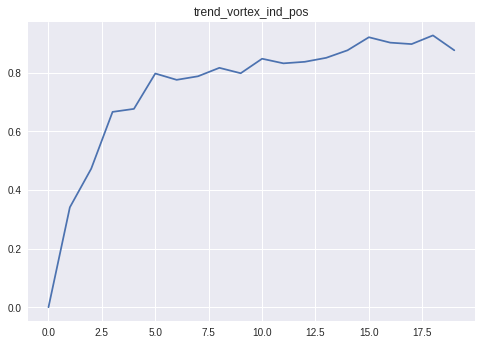

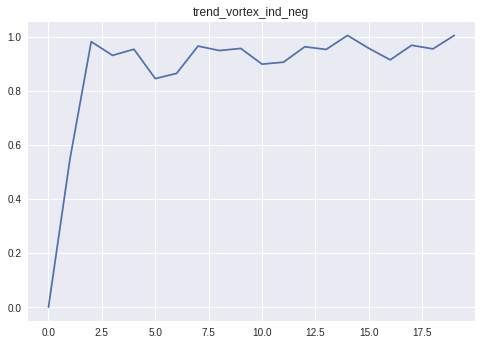

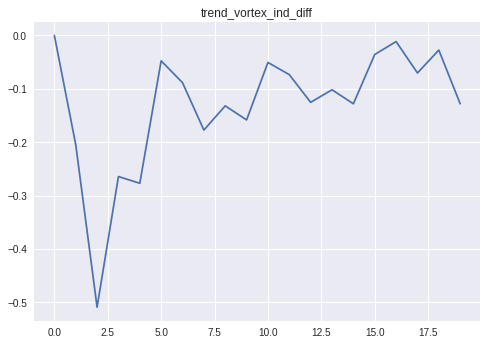

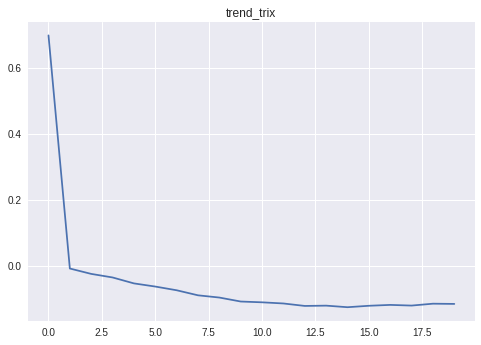

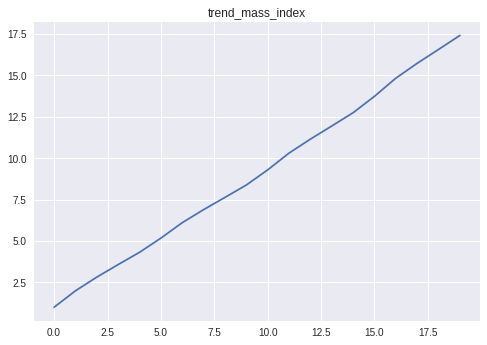

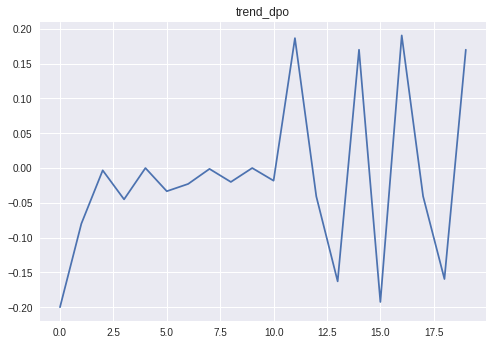

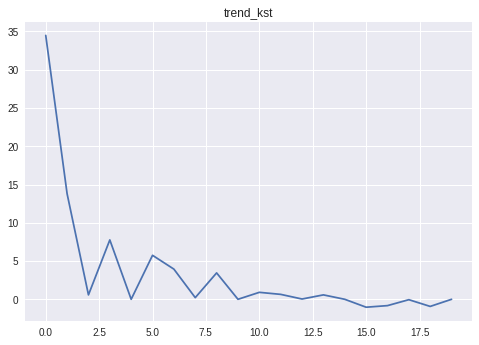

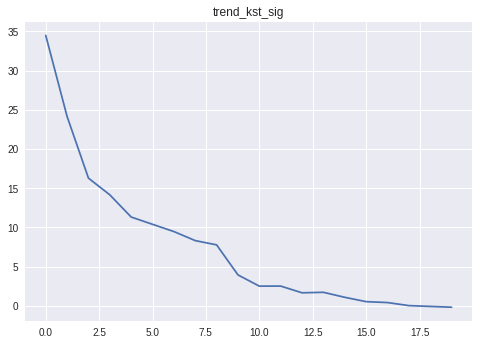

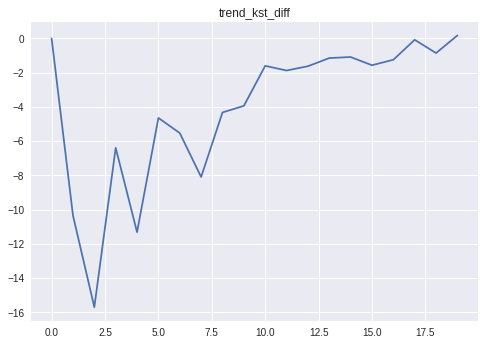

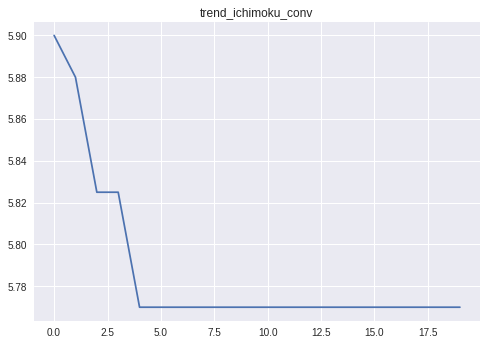

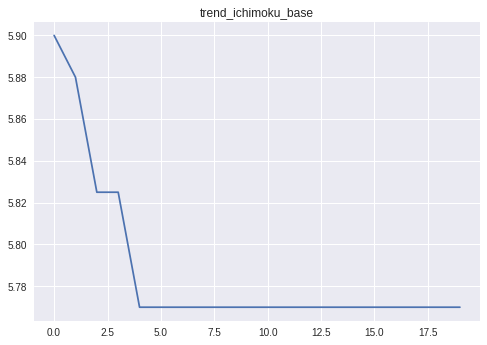

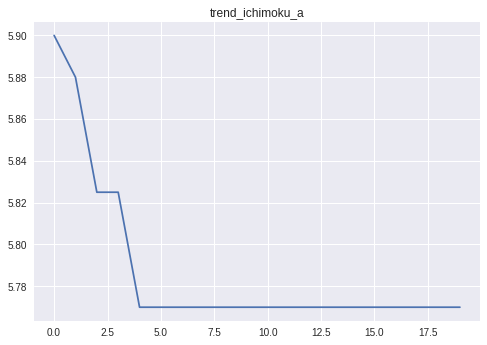

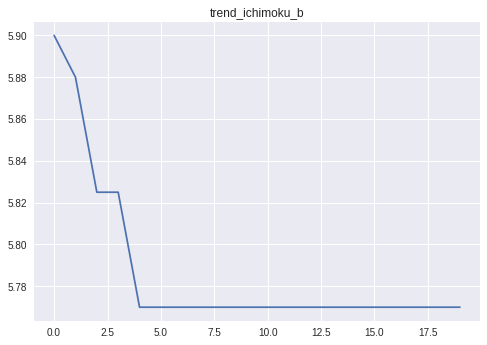

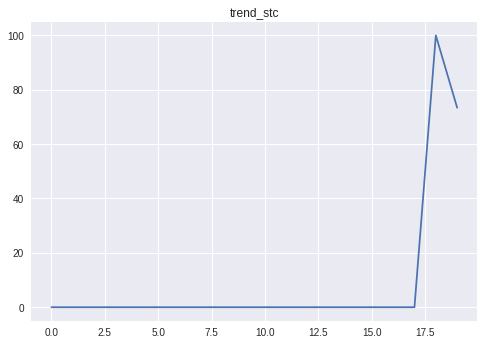

In [ ]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()